## EDA for Smart Cities

In [10]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly import figure_factory as figfac
import missingno as msno

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:/Users/Dell/Downloads/Smart_City_index_headers.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory ("/your/local/directory/path") that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

data = pd.read_csv("C:/Users/Dell/Downloads/Smart_City_index_headers.csv")
# Delete Useless columns
data = data.drop(['Id', 'SmartCity_Index_relative_Edmonton'], axis=1)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   City               102 non-null    object
 1   Country            102 non-null    object
 2   Smart_Mobility     102 non-null    int64 
 3   Smart_Environment  102 non-null    int64 
 4   Smart_Government   102 non-null    int64 
 5   Smart_Economy      102 non-null    int64 
 6   Smart_People       102 non-null    int64 
 7   Smart_Living       102 non-null    int64 
 8   SmartCity_Index    102 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 7.3+ KB


In [20]:
data

,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index
0,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138
1,Bergen,Norway,7097,6876,7350,4905,8050,9090,7296
2,Amsterdam,Netherlands,7540,5558,8528,8095,7098,7280,7311
3,Copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7171
4,Stockholm,Sweden,6122,7692,8354,4330,6743,7730,6812
...,...,...,...,...,...,...,...,...,...
97,Riga,Latvia,4152,4584,4616,7380,3745,4330,4712
98,Beijing,China,7610,2998,2806,4905,5183,1980,4449
99,St Petersburg,Russia,4588,2908,3622,4515,5390,4100,4191
100,Calgary,Canada,6675,4052,5946,8022,6424,8657,6678


In [11]:
top_10_city = data.groupby(['City'], as_index=False).sum().sort_values(['SmartCity_Index'], ascending=False).head(10)['City'].tolist()
top_10_score = data.groupby(['City'], as_index=False).sum().sort_values(['SmartCity_Index'], ascending=False).head(10)['SmartCity_Index'].tolist()
bot_10_city = data.groupby(['City'], as_index=False).sum().sort_values(['SmartCity_Index'], ascending=False).tail(10)['City'].tolist()
bot_10_score = data.groupby(['City'], as_index=False).sum().sort_values(['SmartCity_Index'], ascending=False).tail(10)['SmartCity_Index'].tolist()
country = data.groupby(['Country'], as_index=False).count().sort_values(['City'], ascending=False)
CC1 = country['Country']
CC2 = country['City']

In [12]:
print(country.shape[0], "countries have", data.shape[0],"smart cities")
print("===========================================================")
print("The Top 10 Smartest Cities are")
for i in range(len(top_10_city)):
    i+=0
    print(top_10_city[i], "and it's score is", top_10_score[i])
print("===========================================================")
print("The Bottom 10 Smartest Cities are")
for i in range(len(bot_10_city)):
    i+=0
    print(bot_10_city[i], "and it's score is", bot_10_score[i])
print("===========================================================")
print("How many smart cities are in my country?")
for i in range(len(CC1)):
    i+=0
    print(CC1[i], "has", CC2[i], 'smart city(cities)')
print("===========================================================")

36 countries have 102 smart cities
The Top 10 Smartest Cities are
Montreal and it's score is 7353
Amsterdam and it's score is 7311
Bergen and it's score is 7296
Copenhagen and it's score is 7171
Vancouver and it's score is 7152
Oslo and it's score is 7138
Lyon and it's score is 7075
Trondheim and it's score is 7039
Zurich and it's score is 6984
Helsinki and it's score is 6920
The Bottom 10 Smartest Cities are
Prague and it's score is 4563
Abu Dhabi and it's score is 4549
Tel Aviv and it's score is 4540
Budapest and it's score is 4453
Beijing and it's score is 4449
Moscow and it's score is 4365
Hong Kong and it's score is 4313
Dubai and it's score is 4297
Shanghai and it's score is 4228
St Petersburg and it's score is 4191
How many smart cities are in my country?
Australia has 4 smart city(cities)
Austria has 1 smart city(cities)
Belgium has 1 smart city(cities)
Canada has 6 smart city(cities)
China has 3 smart city(cities)
Czech Republic has 1 smart city(cities)
Denmark has 4 smart cit

In [13]:
for i in data.columns:
    print(i , data[i].nunique())
    print("---------------------------------")

cat_cols = [col for col in data.columns if data[col].nunique() < 10 or data[col].dtype == "O"]

num_cols = [col for col in data.columns if data[col].dtype != "O" and data[col].nunique() > 10 ]

cat_but_car = [ col for col in data.columns if data[col].dtype == "O" and data[col].nunique() > 30]

cat_cols = [ col for col in cat_cols if col not in cat_but_car]

#len(cat_cols)+len(num_cols)+len(cat_but_car)

print("Categorical Variables : " , cat_cols)
print("----------------------------------")
print("Numerical Variables : " , num_cols)

City 102
---------------------------------
Country 36
---------------------------------
Smart_Mobility  100
---------------------------------
Smart_Environment 98
---------------------------------
Smart_Government  98
---------------------------------
Smart_Economy  99
---------------------------------
Smart_People 98
---------------------------------
Smart_Living 38
---------------------------------
SmartCity_Index 100
---------------------------------
Categorical Variables :  []
----------------------------------
Numerical Variables :  ['Smart_Mobility ', 'Smart_Environment', 'Smart_Government ', 'Smart_Economy ', 'Smart_People', 'Smart_Living', 'SmartCity_Index']


                   count         mean          std     min     50%      92%   
Smart_Mobility     102.0  5759.401961  1214.030137  3175.0  5651.5  7490.00  \
Smart_Environment  102.0  5943.500000  1724.032171  1850.0  6495.0  7916.64   
Smart_Government   102.0  5893.803922  1153.375297  2806.0  5911.0  7547.28   
Smart_Economy      102.0  6131.803922  1801.555148  1490.0  6432.5  8207.20   
Smart_People       102.0  5874.049020  1449.096341  2825.0  5747.5  7851.80   
Smart_Living       102.0  6377.039216  2286.397477  1980.0  6485.0  9596.00   
SmartCity_Index    102.0  5991.911765   852.775180  4191.0  6261.5  6978.88   

                       94%      95%      96%      98%      99%      max  
Smart_Mobility     7602.98  7609.85  7674.32  7786.16  7869.17   8110.0  
Smart_Environment  8095.76  8286.30  8311.36  8402.16  8702.98   8844.0  
Smart_Government   7602.44  7638.20  7832.00  8352.00  8526.26   8726.0  
Smart_Economy      8362.60  8398.25  8438.40  8589.50  8931.55   9225.0

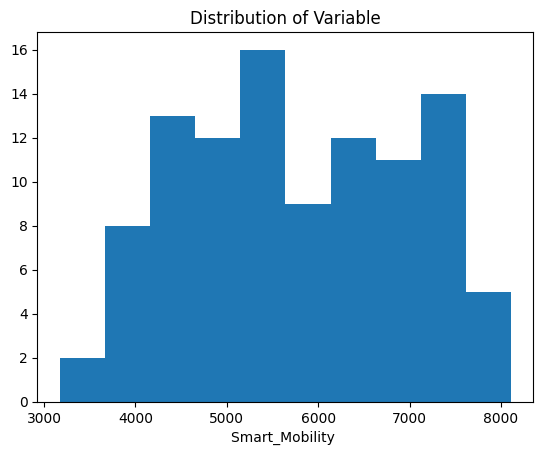

--------------------------- Smart_Environment -----------------------------------
Any Missing Values :  0
------------------------------------------------------------------------
--------------------------------Graph------------------------------


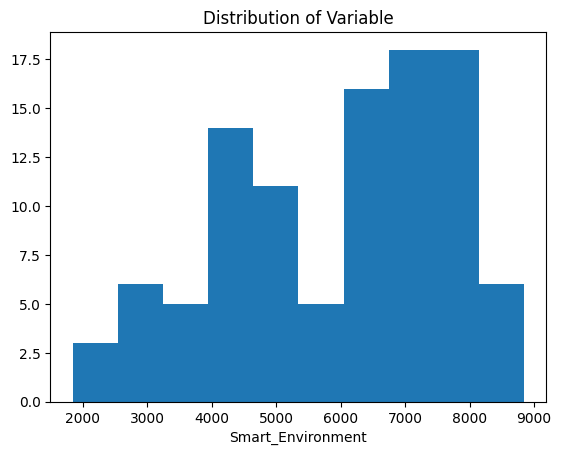

--------------------------- Smart_Government  -----------------------------------
Any Missing Values :  0
------------------------------------------------------------------------
--------------------------------Graph------------------------------


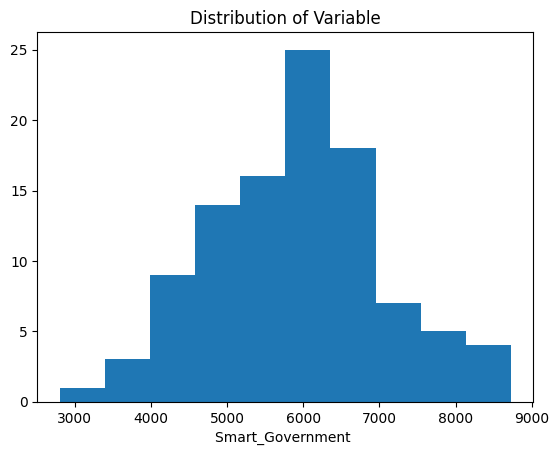

--------------------------- Smart_Economy  -----------------------------------
Any Missing Values :  0
------------------------------------------------------------------------
--------------------------------Graph------------------------------


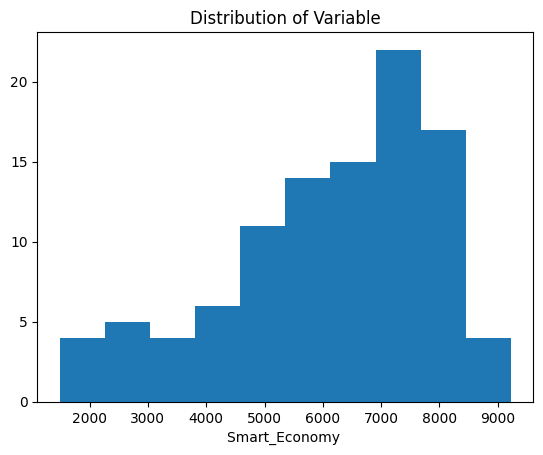

--------------------------- Smart_People -----------------------------------
Any Missing Values :  0
------------------------------------------------------------------------
--------------------------------Graph------------------------------


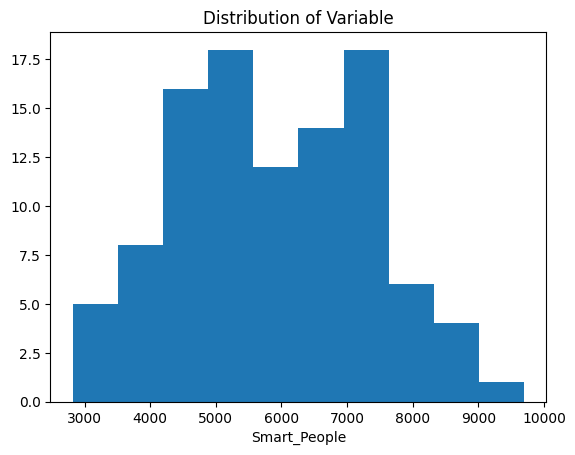

--------------------------- Smart_Living -----------------------------------
Any Missing Values :  0
------------------------------------------------------------------------
--------------------------------Graph------------------------------


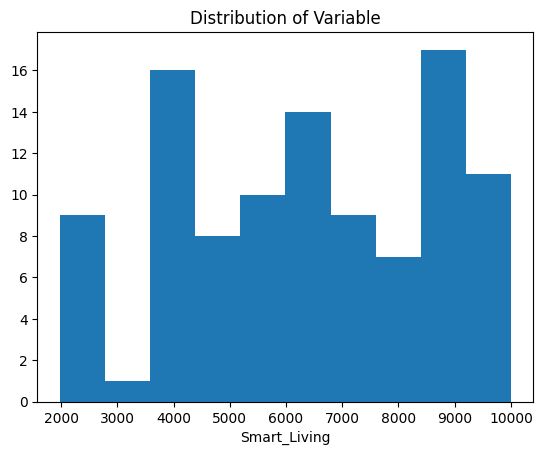

--------------------------- SmartCity_Index -----------------------------------
Any Missing Values :  0
------------------------------------------------------------------------
--------------------------------Graph------------------------------


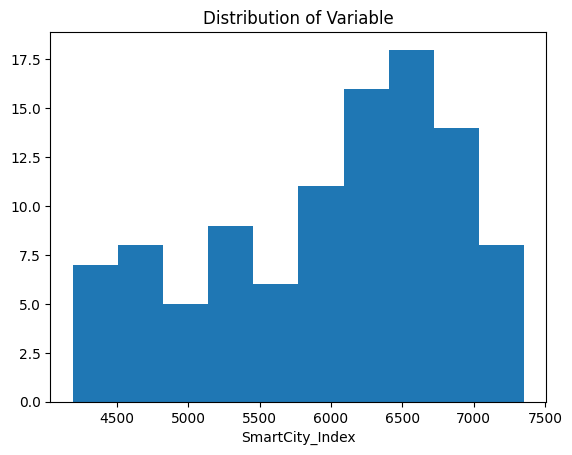

In [14]:
def num_variable_overview(dataframe , num_col,dist_plot = False) :
    print(dataframe[num_col].describe([0.92, 0.94, 0.95, 0.96, 0.98, 0.99]).T)
    for i in num_col :
        print("---------------------------" , i , "-----------------------------------")
        print("Any Missing Values : ", dataframe[num_col].isnull().sum().sum())
        print("------------------------------------------------------------------------")

        if dist_plot :
            print("--------------------------------Graph------------------------------")
            plt.hist(dataframe[i])
            plt.title("Distribution of Variable")
            plt.xlabel(i)
            plt.show()
            
num_variable_overview(data,num_cols,dist_plot= True)

In [15]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def outlier_number(dataframe, col_name, q1=0.25, q3=0.75) :
        low_lim, up_lim = outlier_thresholds(dataframe, col_name,q1,q3)
        print("-----------------------" , i , "--------------------")
        print("Lower Bound : " , low_lim)
        print("Upper Bound : " , up_lim)
        print("Number of Outliers : " , dataframe[(dataframe[i] < low_lim) | (dataframe[i] > up_lim)].shape[0])

for i in num_cols :
    outlier_number(data,i,q1=0.05,q3=0.95)

----------------------- Smart_Mobility  --------------------
Lower Bound :  -1662.2750000000005
Upper Bound :  13173.125
Number of Outliers :  0
----------------------- Smart_Environment --------------------
Lower Bound :  -5086.199999999996
Upper Bound :  16309.799999999994
Number of Outliers :  0
----------------------- Smart_Government  --------------------
Lower Bound :  -1297.0499999999997
Upper Bound :  12999.349999999999
Number of Outliers :  0
----------------------- Smart_Economy  --------------------
Lower Bound :  -6533.625
Upper Bound :  17357.375
Number of Outliers :  0
----------------------- Smart_People --------------------
Lower Bound :  -3158.2499999999973
Upper Bound :  14759.749999999996
Number of Outliers :  0
----------------------- Smart_Living --------------------
Lower Bound :  -8520.0
Upper Bound :  20504.0
Number of Outliers :  0
----------------------- SmartCity_Index --------------------
Lower Bound :  420.72500000000036
Upper Bound :  11163.324999999999
Nu

In [ ]:
msno.bar(data)

Text(0.5, 1.0, 'Smart Cities in Countries')

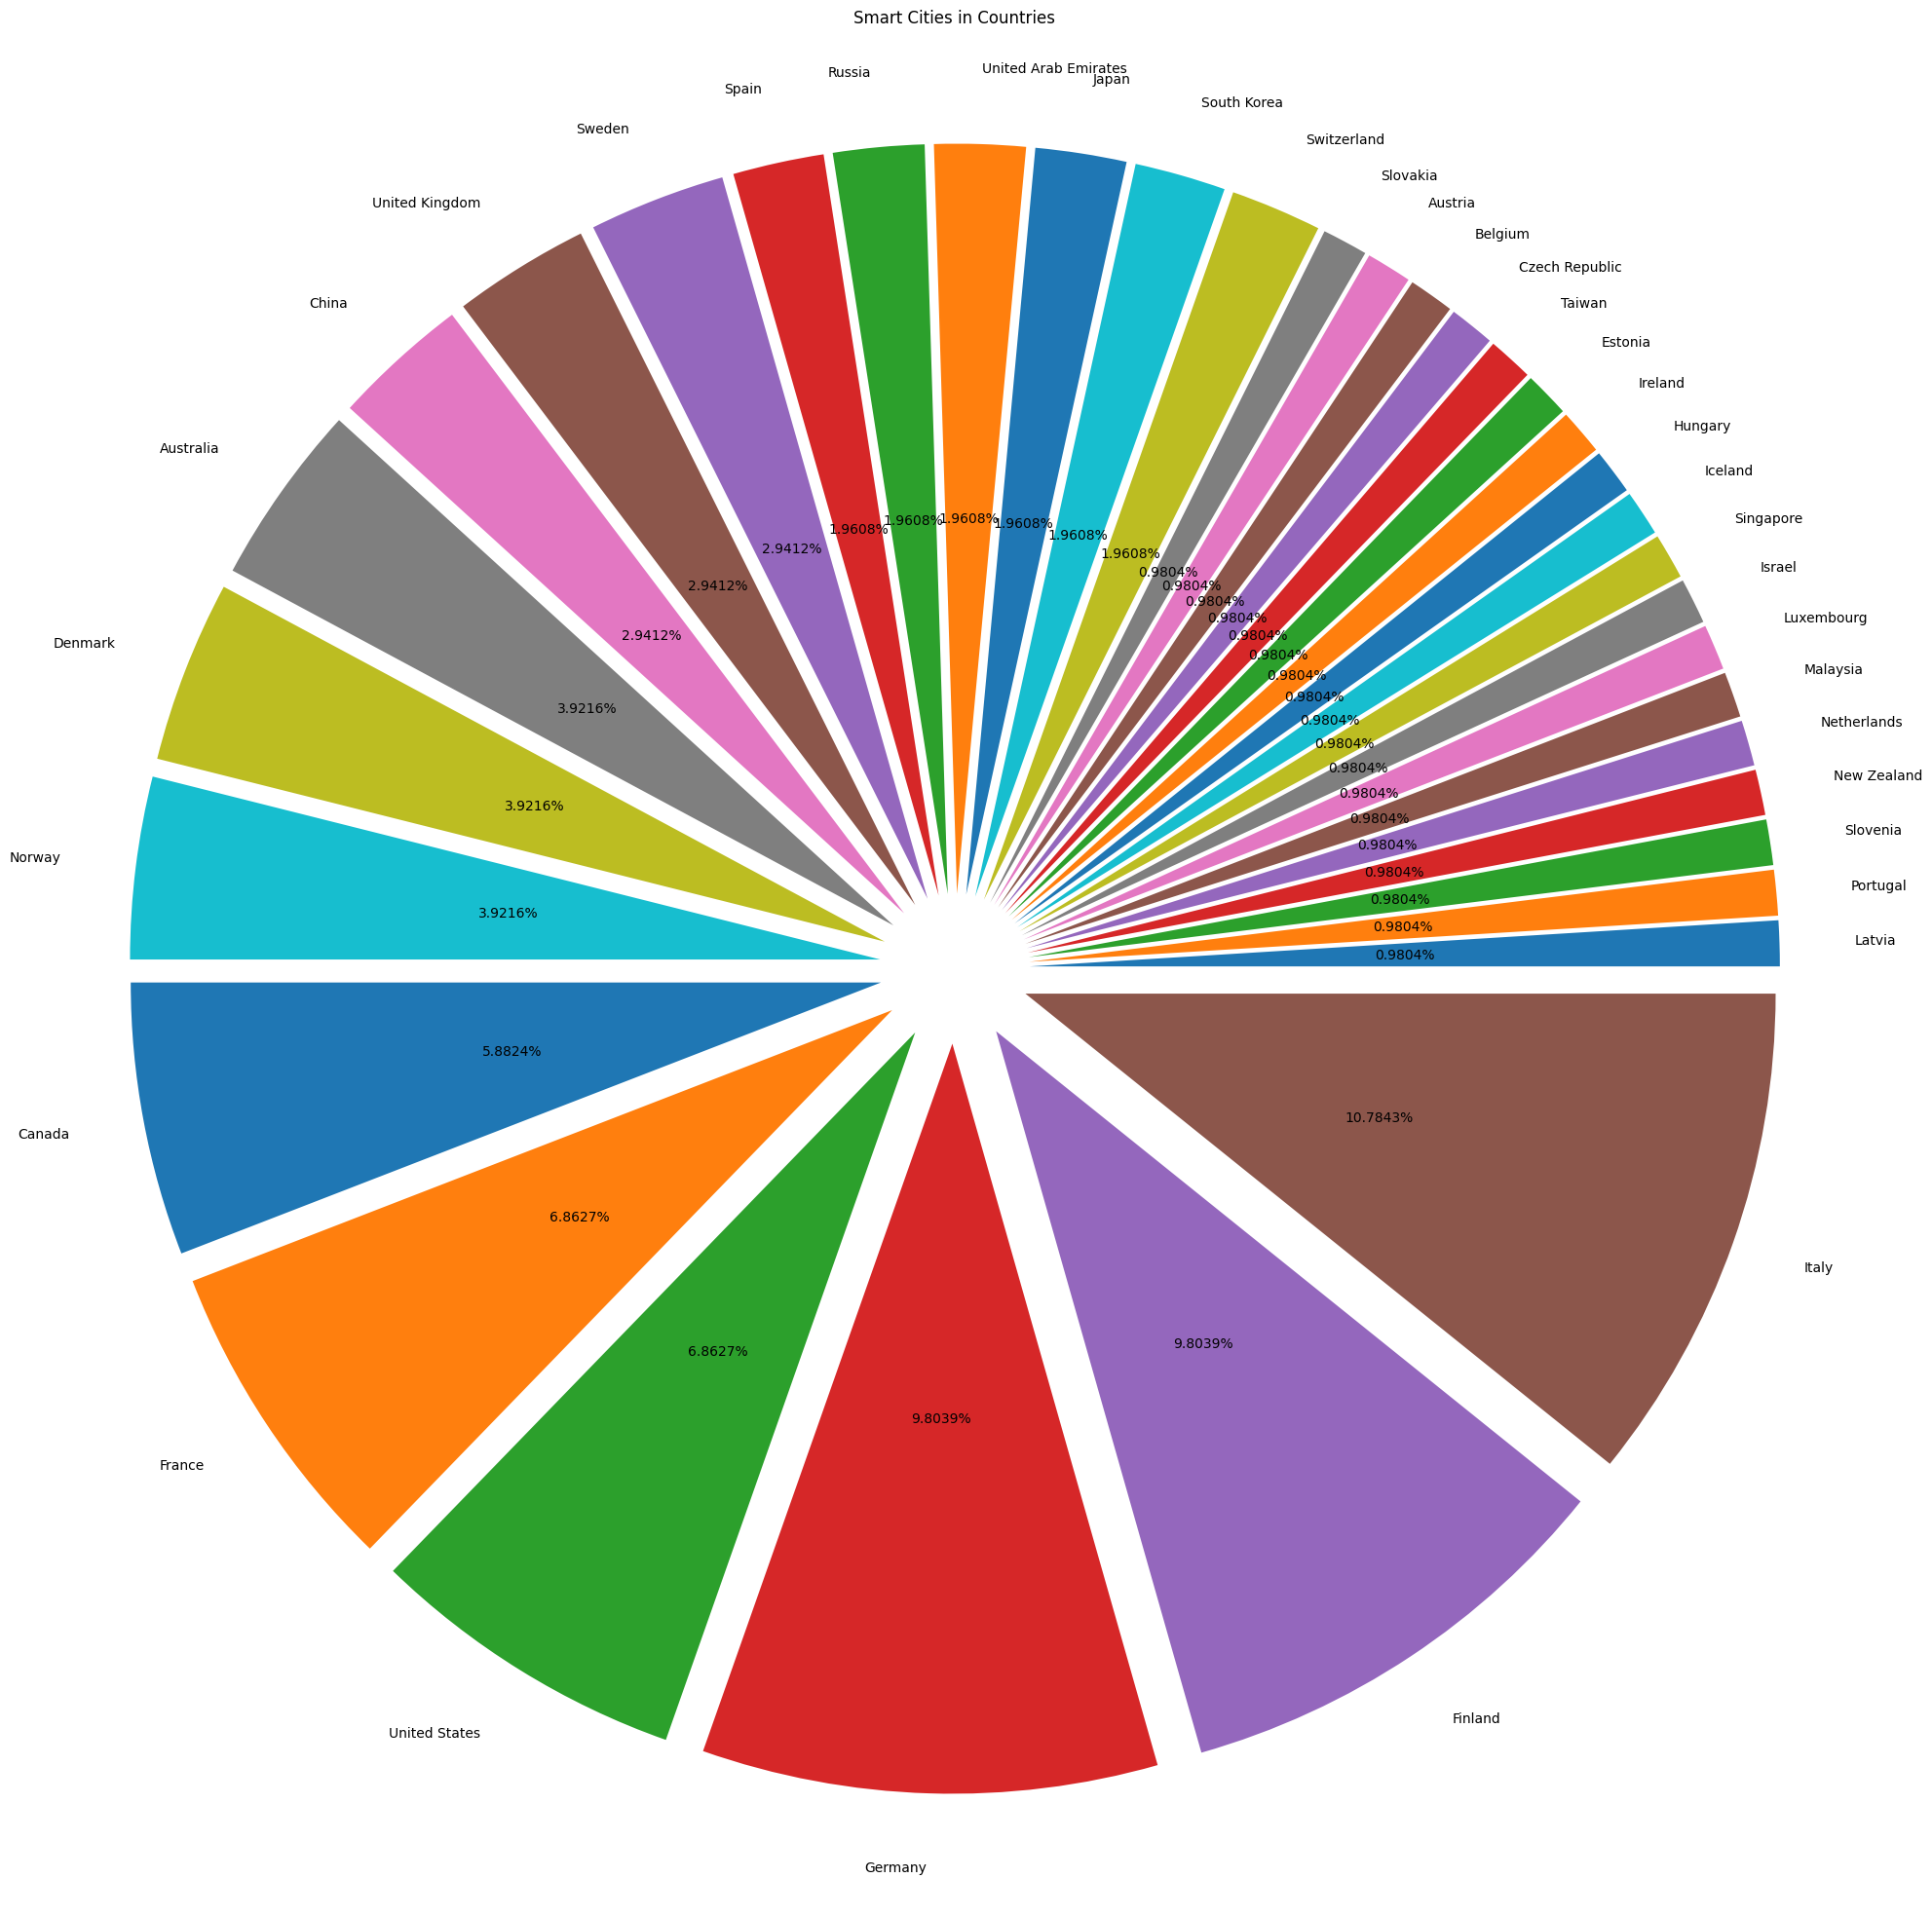

In [17]:
city = data.groupby(['Country']).count().sort_values(['SmartCity_Index'])['SmartCity_Index']
labels = city.keys()
plt.figure(figsize=(25,25))
ax = plt.pie(x=city, autopct="%.4f%%", explode=[0.1]*city.shape[0], labels=labels, pctdistance=0.5)
plt.title("Smart Cities in Countries")

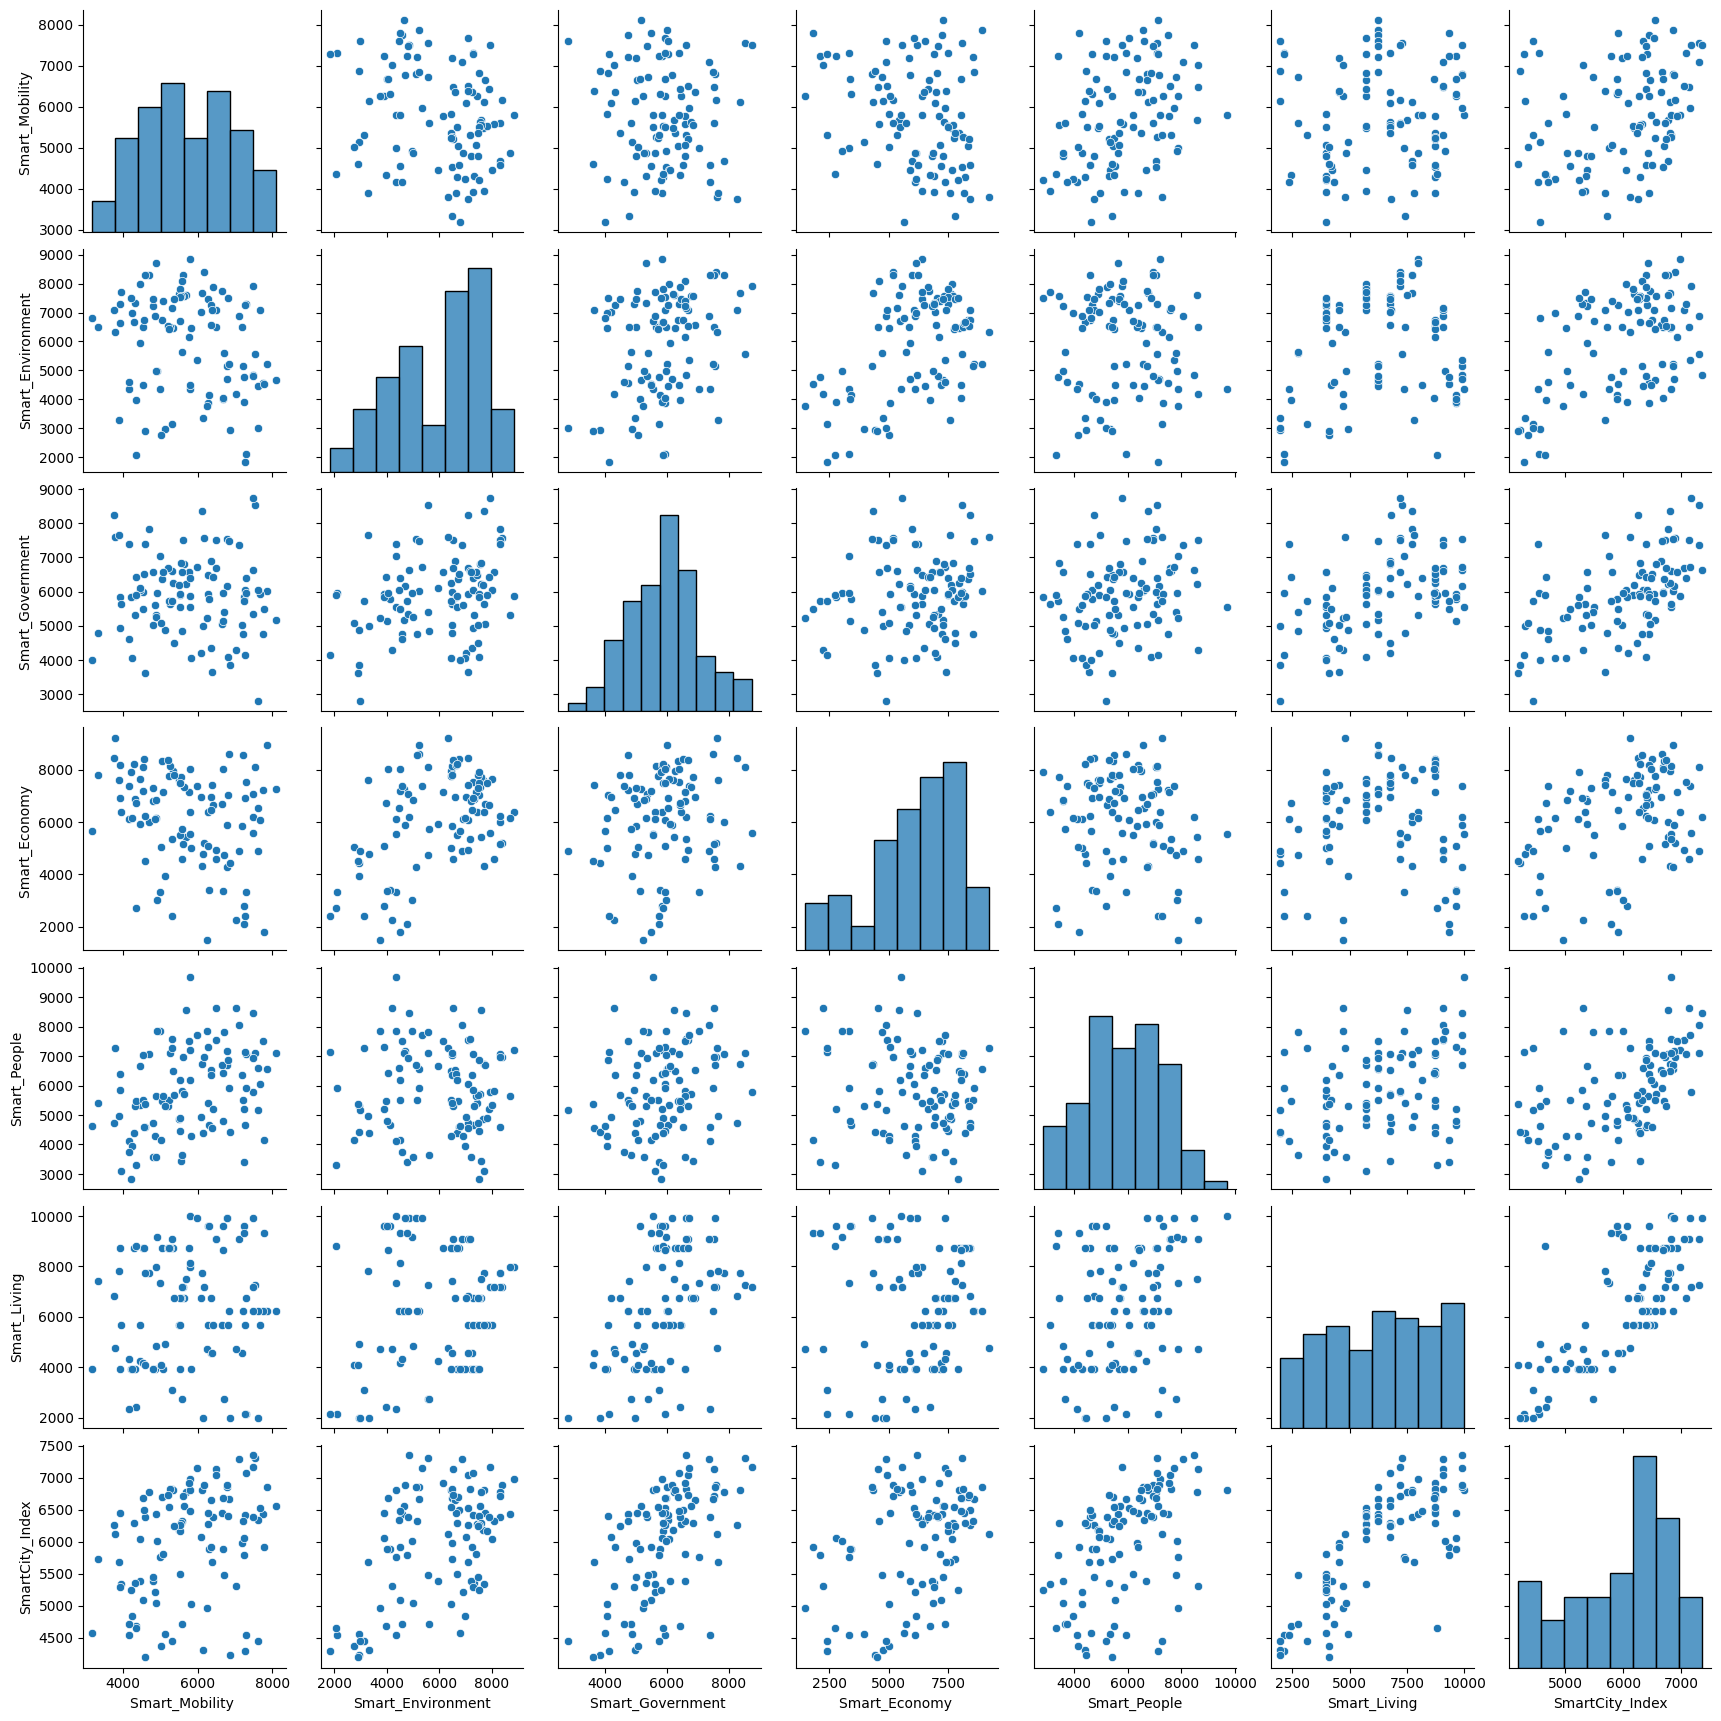

In [18]:
sns.pairplot(data[['Smart_Mobility ', 'Smart_Environment', 'Smart_Government ','Smart_Economy ','Smart_People','Smart_Living','SmartCity_Index']])

<Axes: >

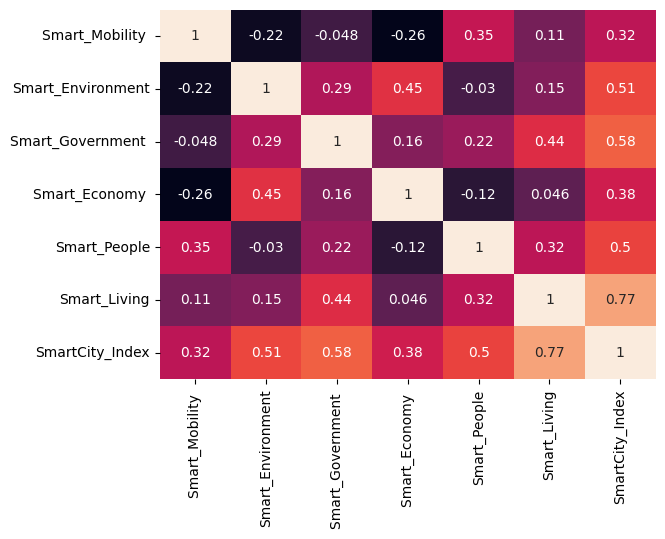

In [19]:
corr=data[['Smart_Mobility ', 'Smart_Environment', 'Smart_Government ','Smart_Economy ','Smart_People','Smart_Living','SmartCity_Index']].corr()
sns.heatmap(corr, annot=True, cbar=False )

This code uses scikit-learn's MLPRegressor for regression. The preprocessing steps are similar to the next examples. You can adjust the hyperparameters of the MLPRegressor to fit the specific needs.

 the provided code is designed to predict the SmartCity_Index. The model is a regression model, specifically an artificial neural network implemented using scikit-learn's MLPRegressor. The training process involves adjusting the model's parameters to learn a mapping from the input features (such as city attributes) to the target variable SmartCity_Index.

##### After training, the model can make predictions on new data. In the code, predictions are made on the test set (X_test), and the Mean Squared Error (MSE) and Mean Absolute Error (MAE) are calculated to evaluate how well the model performs in predicting the SmartCity_Index.

In [41]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assuming 'df' is your DataFrame
X = data.drop('SmartCity_Index', axis=1)
y = data['SmartCity_Index']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define preprocessing for numerical and categorical features
numeric_features = X.select_dtypes(include=['int64']).columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
#model = MLPRegressor(hidden_layer_sizes=(8, 32), activation='relu', random_state=42, max_iter=500)
model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', random_state=42, max_iter=200, learning_rate_init=0.001)

# Combine preprocessor and model into a single pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', model)])

# Fit the model to the training data
pipeline.fit(X_train, y_train)

# Make predictions
predictions = pipeline.predict(X_test)

# Evaluate the model on the test set
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f'Mean Squared Error on Test Set: {mse}')
print(f'Mean Absolute Error on Test Set: {mae}')


Mean Squared Error on Test Set: 36118089.8514121
Mean Absolute Error on Test Set: 5966.269363626928


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


This example uses scikit-learn's RandomForestRegressor for the regression task.

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 'data' is a DataFrame
X = data.drop('SmartCity_Index', axis=1)
y = data['SmartCity_Index']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical and categorical features
numeric_features = X.select_dtypes(include=['int64']).columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', model)])

# Fit the model to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 75448.15752380955
Mean Absolute Error (MAE): 207.72666666666677
R-squared (R2): 0.8743585962773911


In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 'data' is a DataFrame
X = data.drop('SmartCity_Index', axis=1)
y = data['SmartCity_Index']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical and categorical features
numeric_features = X.select_dtypes(include=['int64']).columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model using Keras
model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Combine preprocessor and model into a single pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', model)])

# Fit the model to the training data
pipeline.fit(X_train, y_train, model__epochs=50, model__batch_size=32, model__verbose=2)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')


Epoch 1/50


ValueError: in user code:

    File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 8), found shape=(None, 118)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming data is your DataFrame
X = data.drop('SmartCity_Index', axis=1)
y = data['SmartCity_Index']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical and categorical features
numeric_features = X.select_dtypes(include=['int64']).columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Combine preprocessor and model into a single pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', model)])

# Fit the model to the training data
pipeline.fit(X_train, y_train, model__epochs=50, model__batch_size=32, model__verbose=2)

# Evaluate the model on the test set
mse = pipeline.score(X_test, y_test)
print(f'Mean Squared Error on Test Set: {mse}')

# Make predictions
predictions = pipeline.predict(X_test)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Assuming data is your DataFrame
X = data.drop('SmartCity_Index', axis=1)
y = data['SmartCity_Index']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical and categorical features
numeric_features = X.select_dtypes(include=['int64']).columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Check the number of features in X_train
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Combine preprocessor and model into a single pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', model)])

# Fit the model to the training data
history = pipeline.fit(X_train, y_train, model__epochs=50, model__batch_size=32, model__verbose=2)

# Evaluate the model on the test set
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Assuming data is your DataFrame
X = data.drop('SmartCity_Index', axis=1)
y = data['SmartCity_Index']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical and categorical features
numeric_features = X.select_dtypes(include=['int64']).columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Check the number of features in X_train
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Combine preprocessor and model into a single pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', model)])

# Fit the model to the training data
history = pipeline['model'].fit(pipeline['preprocessor'].transform(X_train), y_train, epochs=50, batch_size=32, verbose=2, validation_split=0.2)

# Evaluate the model on the test set
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Assuming data is your DataFrame
X = data.drop('SmartCity_Index', axis=1)
y = data['SmartCity_Index']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical and categorical features
numeric_features = X.select_dtypes(include=['int64']).columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Check the number of features in X_train
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Combine preprocessor and model into a single pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', model)])

# Fit the entire pipeline to the training data
pipeline.fit(X_train, y_train, model__epochs=50, model__batch_size=32, model__verbose=2)

# Now, you can use the fitted pipeline for making predictions or transforming data

# Evaluate the model on the test set
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')


For regression problems (predicting a continuous variable like the "SmartCity_Index"), we don't typically use metrics such as accuracy, confusion matrix, or classification report, as they are more suitable for classification problems where the output is categorical.

In regression tasks, you typically use metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), or R-squared (coefficient of determination) to evaluate the performance of the model.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ... (Split the data, define preprocessing, and create the model)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model to the training data
pipeline.fit(X_train, y_train, model__epochs=50, model__batch_size=32, model__verbose=2)

# Evaluate the model on the test set
y_pred = pipeline.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')


By Saad Farah